In [41]:
# all the imports
import pandas as pd
import matplotlib.pyplot as plt

import os
import glob

import numpy as np

**Outdated** (used different function generator and oscilloscope for final experiment)

*First, the noise produced by the function generator has to be determined. For this, we chose different settings with varying attenuation [0 dB, 20 dB, 40 dB] and frequencies [5 Hz, 40 Hz]. The displayed sinus' are the result using the Voltcraft FG-506 function generator in combination with a Rhode & Scharz Oscilloscope) HMO 1524. Due to the update/save implementation of the oscillator, some sudden jumps could not be prevented (eg. TRC04.csv).*


In [42]:
def display_two_complete(filename1, filename2, title):
    '''
    Displays the two rounds of test we need with each setting combination in a graph
    -------------------------------------------------------------------------------
    filename1 (string): name of the first file as a string, has to be in same folder
    filename2 (string): name of the second file as a string, has to be in same folder
    title (string): specification of attenuation and frequency 
    '''
    df1 = pd.read_csv(filename1, index_col=0).rename(columns = {'CH1[V]':filename1})
    df2 = pd.read_csv(filename2, index_col=0).rename(columns = {'CH1[V]':filename2})
    df = df1.join(df2[filename2])
    df.plot(y=[filename1,filename2], use_index = True, grid=True , title = title, figsize=(15,5))
    
#display_two_complete('TRC04.csv','TRC05.csv', "0dB, 5Hz" )
#display_two_complete('TRC06.csv','TRC07.csv', "20dB, 5Hz")
#display_two_complete('TRC08.csv','TRC09.csv', "40dB, 5Hz")
#display_two_complete('TRC10.csv','TRC11.csv', "0dB, 40Hz")

In [43]:
# First trial, hence obsolete

# import the data we measured with the Traumschreiber

# TodaysExp =  pd.read_csv("test2.csv")#, index_col=0)

# exp2 =  pd.read_csv("20200709-12h01EEGrecording.csv")
# exp3 =  pd.read_csv("20200709-12h04EEGrecording.csv")
# exp4 =  pd.read_csv("20200709-12h12EEGrecording.csv")
# exp5 =  pd.read_csv("20200709-12h23EEGrecording.csv")
# exp6 =  pd.read_csv("20200709-12h25EEGrecording.csv")
# exp7 =  pd.read_csv("20200709-12h31EEGrecording.csv")
# exp8 =  pd.read_csv("20200709-12h34EEGrecording.csv")
# exp9 =  pd.read_csv("20200709-12h43EEGrecording.csv")


# def displayAllTheChannels(file):
#     file = file.loc[0.004:1.004]
#     file.rename(columns={'Unnamed: 1':'Channel 1', 'Unnamed: 2':'Channel 2', 'Unnamed: 3':'Channel 3', 'Unnamed: 4':'Channel 4', 'Unnamed: 5':'Channel 5', 'Unnamed: 6':'Channel 6'}, inplace=True )
#     file.plot(y=["Channel 1", "Channel 2" , "Channel 3" , "Channel 4" , "Channel 5", "Channel 6" ], grid=True , figsize=(15,30), subplots=True, layout=(6,1))


# displayAllTheChannels(exp9)

In [46]:

def tidyTSAppOutput(file, sec = False):
    """
    Tidies the App Output to better plot in the next steps. Removes meta data and sets the timestaps as index.
    Timestamp is in msec, if not desired it can be changed to seconds here. But this results in slightly 
    different visualization in the next steps 
    --------------------
    Parameter:
        file: A pandas dataframe created from in the original app format
        sec (boolean): If true mesec are transformed into seconds
        
        Returns:
        file: cleaned up dataframe
        
    """
    file = file.iloc[1:]
    file.columns = file.iloc[0]
    file = file[1:].apply(pd.to_numeric, errors='ignore')
    # to set index to seconds and not miliseconds
    if sec:
        sec_index = file.index[:].tolist()
        sec_index = [float(i) for i in sec_index]
        sec_index[:] = [x / 1000 for x in sec_index] #converts 
        file.index = sec_index
    
    return file

def plot_trace(df, channelname, fro = 0, to = 200, sec=False, title = "Experiment", save = False, saveas = "Experiment"):
    """
    Plots the trace from individual Traumschreiber channels. 
    --------------
    Parameter:
    df: a cleaned up dataframe containing the app output
    channelname (array with string): the channelname to be displayed (["Ch-1"],["Ch-2"],["Ch-3"],["Ch-4"],["Ch-5"],["Ch-6"]) 
    fro (int): starting point to plot the trace. The fro_th datapoint is plotted
    to (int): The to_th datapoint is the end of the plot
    sec (boolean): If index is in seconds (specified in tidyTSAppOutput), the axis label is changed 
    title: Title of the plot
    save (boolean): True if plot shall be saved (in working directory) as png
    saveas (string): Name of the saved file
    """
    ax = df.iloc[fro:to].plot(y = [channelname], grid = True, title = title, figsize=(15,3))
    if sec:
        ax.set_xlabel("s") 
    else:
        ax.set_xlabel("msec")
    # ax.set_ylabel("mVolt") # verify the correct unit    
    if save:    
        plt.savefig(saveas+'.png') # saves as .png at the moment as was better for displaying/discussing in slack




In [47]:
# automate the plotting/saving because writing a function will save at least 5 seconds in the long run over doing it manually. 
path = os.getcwd()
extension = 'csv'
os.chdir(path)
all_csv = glob.glob('*.{}'.format(extension))

specification =["Board 02, 5 Hz, 50 mV","Board 02, 5 Hz, 50 mV","Board 02, 5 Hz, 50 mV","Board 02, 5 Hz, 50 mV","Board 02, 5 Hz, 50 mV","Board 02, 5 Hz, 50 mV",
               "Board 02, 5 Hz, 100 mV","Board 02, 5 Hz, 100 mV","Board 02, 5 Hz, 100 mV","Board 02, 5 Hz, 100 mV","Board 02, 5 Hz, 100 mV","Board 02, 5 Hz, 100 mV",
               "Board 02, 40 Hz, 100 mV","Board 02, 40 Hz, 100 mV","Board 02, 40 Hz, 100 mV","Board 02, 40 Hz, 100 mV","Board 02, 40 Hz, 100 mV","Board 02, 40 Hz, 100 mV",
               "Board 02, 40 Hz, 50 mV","Board 02, 40 Hz, 50 mV","Board 02, 40 Hz, 50 mV","Board 02, 40 Hz, 50 mV","Board 02, 40 Hz, 50 mV","Board 02, 40 Hz, 50 mV",
               "Board 03, 5 Hz, 50 mV, Battery","Board 03, 5 Hz, 50 mV, no Battery", "Board 02, 5 Hz, 50 mV, Battery",
               "Board 03, 5 Hz, 100 mV, Battery","Board 03, 40 Hz, 100 mV, Battery","Board 03, 40 Hz, 50 mV, Battery", "Board 02, 5 Hz, 100 mV, Battery"] #specifications for the single experiments in accord with the order os reads the file in.

channel_specs = ["Ch-1","Ch-2","Ch-3","Ch-4","Ch-5","Ch-6",
                "Ch-1","Ch-2","Ch-3","Ch-4","Ch-5","Ch-6",
                "Ch-1","Ch-2","Ch-3","Ch-4","Ch-5","Ch-6",
                "Ch-1","Ch-2","Ch-3","Ch-4","Ch-5","Ch-6",
                "Ch-1","Ch-1", "Ch-2", "Ch-1","Ch-1","Ch-1", "Ch-2"]


Exp1_1 Board 02, 5 Hz, 50 mV Ch-1
Exp2 Board 02, 5 Hz, 50 mV Ch-2
Exp3 Board 02, 5 Hz, 50 mV Ch-3
Exp4_1 Board 02, 5 Hz, 50 mV Ch-4
Exp5 Board 02, 5 Hz, 50 mV Ch-5
Exp6  Board 02, 5 Hz, 50 mV Ch-6
Exp7 Board 02, 5 Hz, 100 mV Ch-1
Exp8 Board 02, 5 Hz, 100 mV Ch-2
Exp9 Board 02, 5 Hz, 100 mV Ch-3
Exp10 Board 02, 5 Hz, 100 mV Ch-4
Exp11 Board 02, 5 Hz, 100 mV Ch-5
Exp12 Board 02, 5 Hz, 100 mV Ch-6
Exp13  Board 02, 40 Hz, 100 mV Ch-1
Exp14  Board 02, 40 Hz, 100 mV Ch-2
Exp15 Board 02, 40 Hz, 100 mV Ch-3
Exp16 Board 02, 40 Hz, 100 mV Ch-4
Exp17 Board 02, 40 Hz, 100 mV Ch-5
Exp18 Board 02, 40 Hz, 100 mV Ch-6
Exp19 Board 02, 40 Hz, 50 mV Ch-1
Exp20  Board 02, 40 Hz, 50 mV Ch-2
Exp21 Board 02, 40 Hz, 50 mV Ch-3


C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


Exp22 Board 02, 40 Hz, 50 mV Ch-4


C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


Exp23 Board 02, 40 Hz, 50 mV Ch-5


C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


Exp24 Board 02, 40 Hz, 50 mV Ch-6


C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


Exp25 Board 03, 5 Hz, 50 mV, Battery Ch-1


C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


Exp26 Board 03, 5 Hz, 50 mV, no Battery Ch-1


C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


Exp31 Board 02, 5 Hz, 50 mV, Battery Ch-2


C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


Exp29  Board 03, 5 Hz, 100 mV, Battery Ch-1


C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


Exp28  Board 03, 40 Hz, 100 mV, Battery Ch-1


C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


Exp27 Board 03, 40 Hz, 50 mV, Battery Ch-1


C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


Exp32 Board 02, 5 Hz, 100 mV, Battery Ch-2


C:\Users\lkrie\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


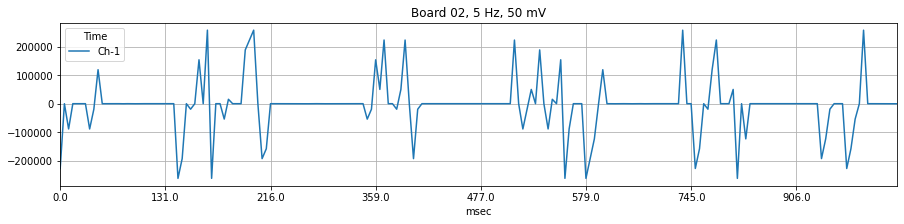

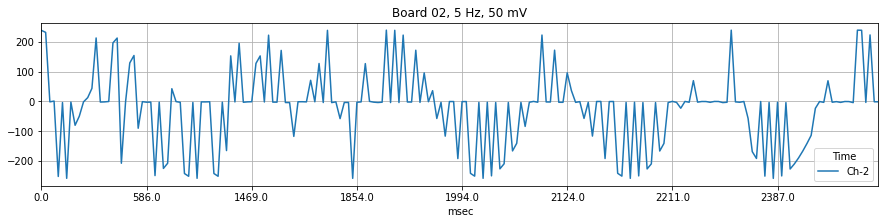

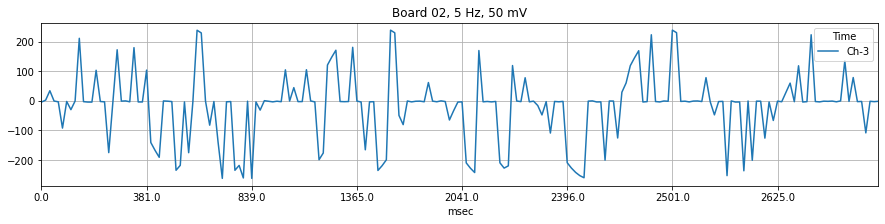

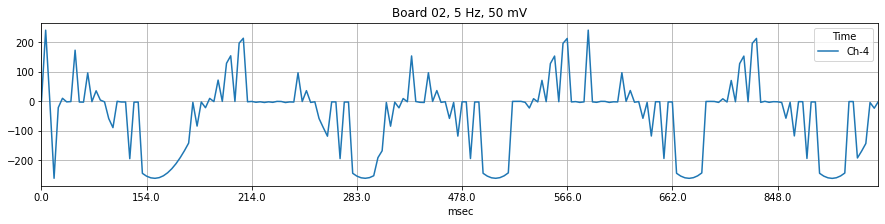

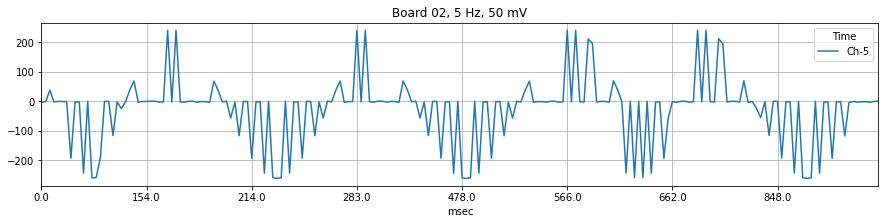

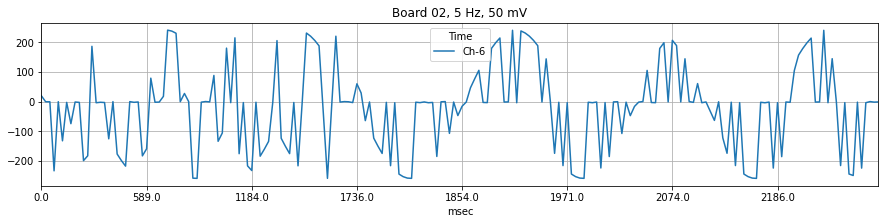

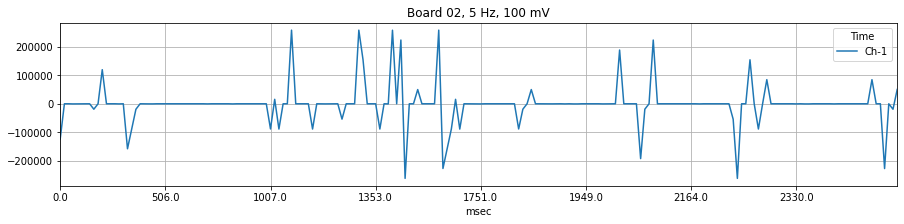

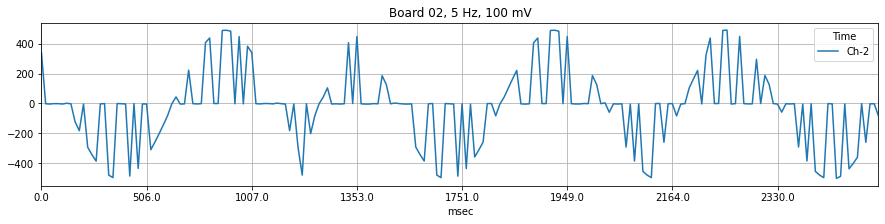

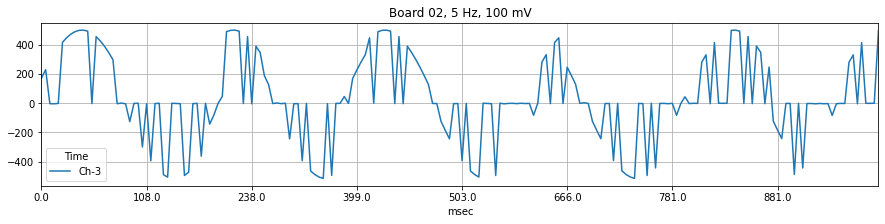

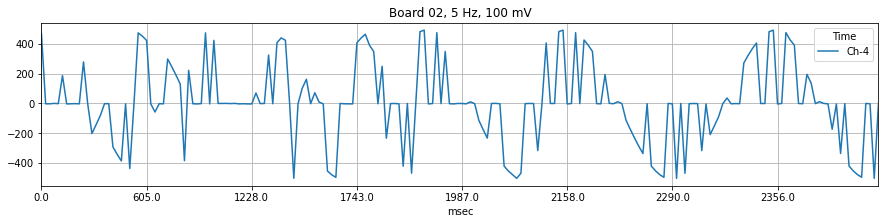

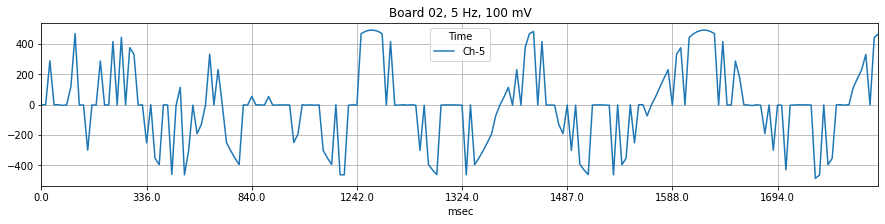

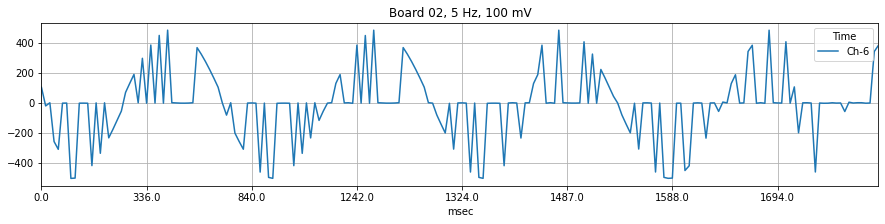

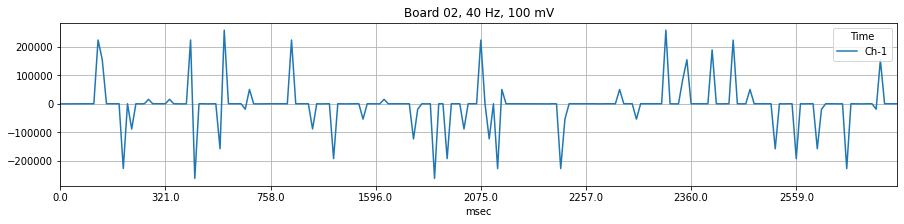

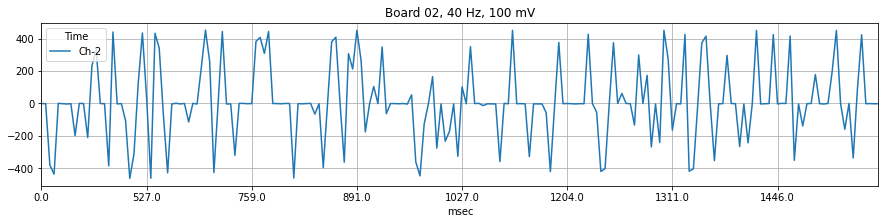

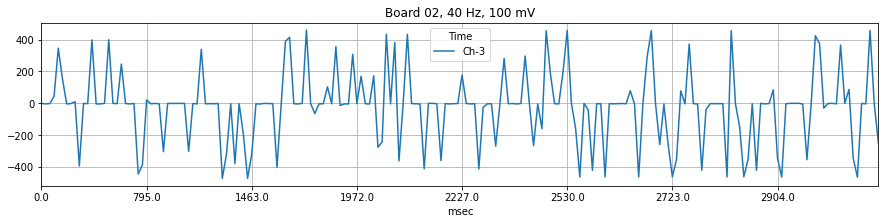

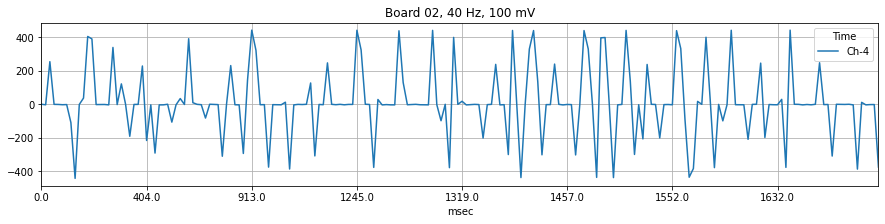

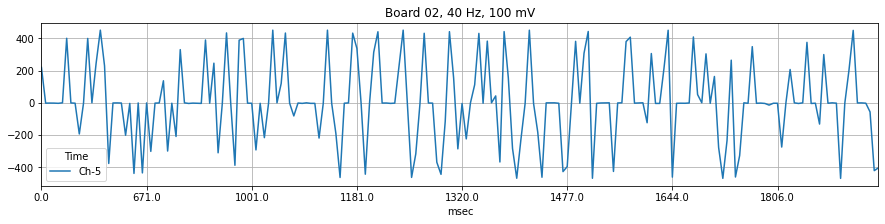

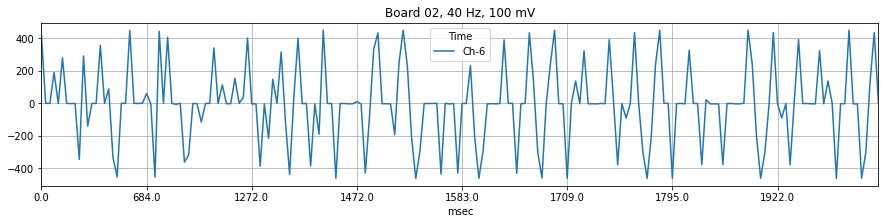

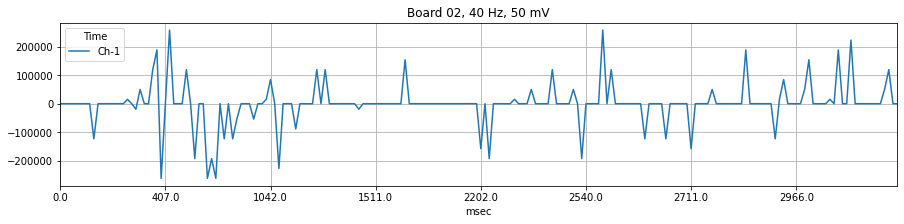

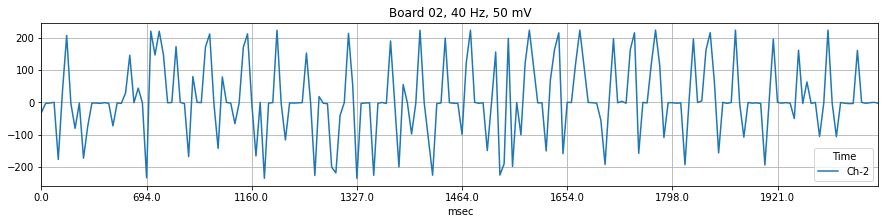

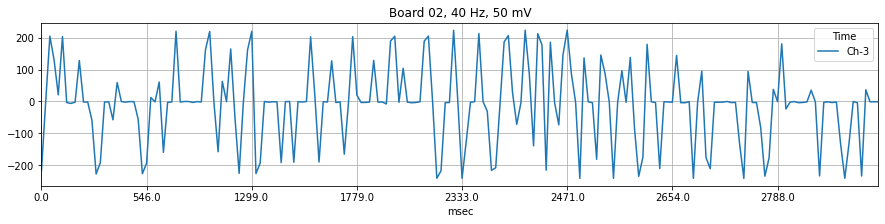

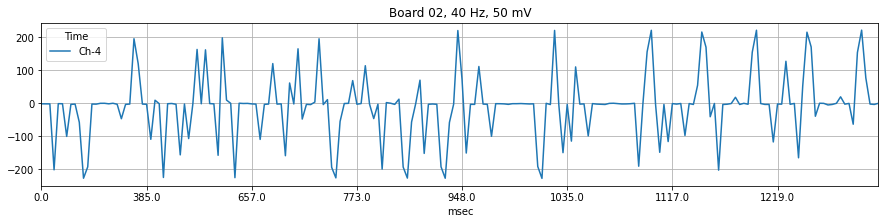

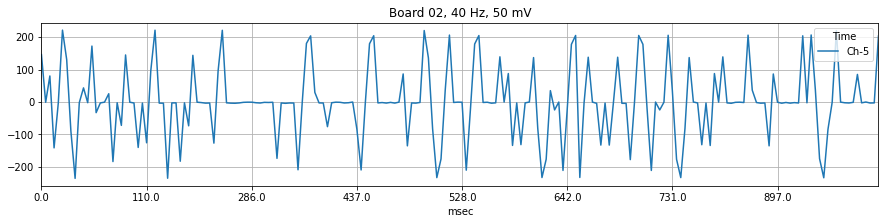

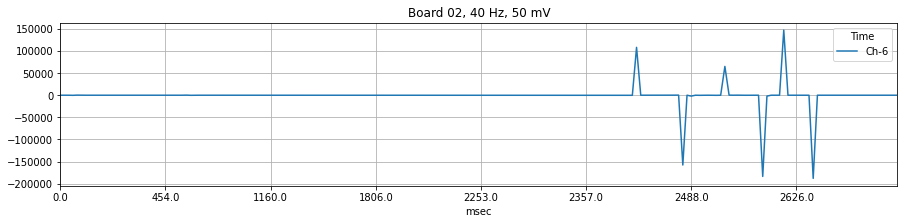

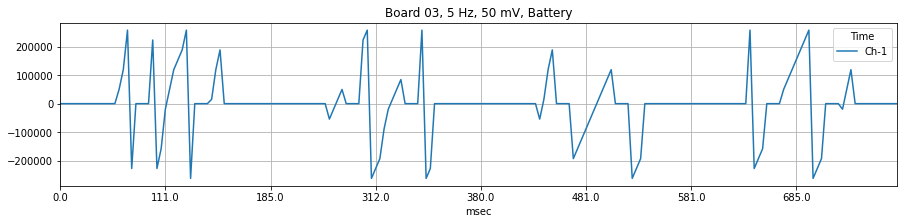

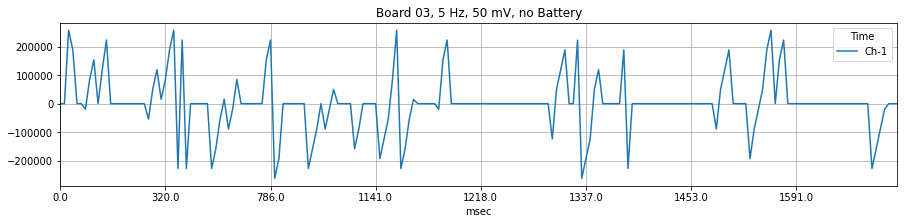

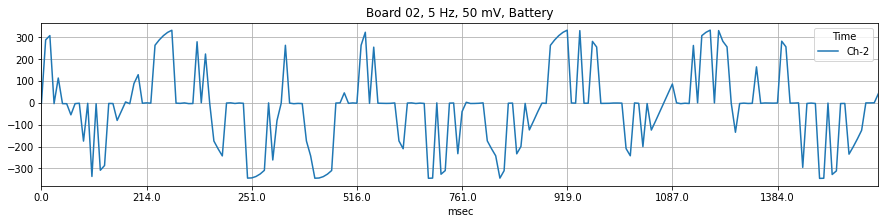

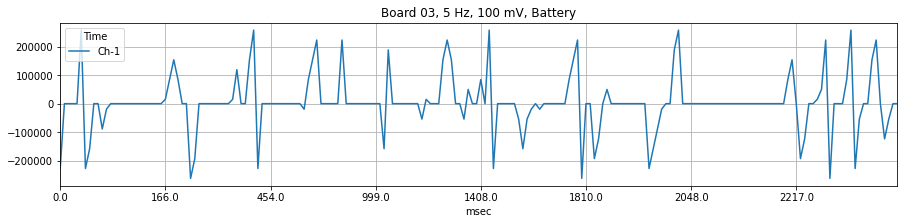

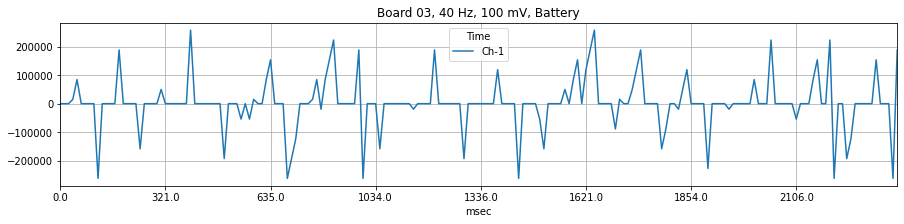

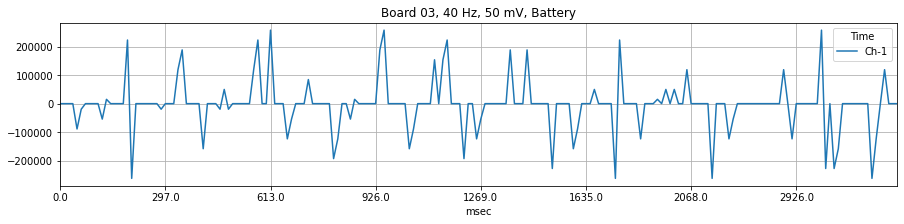

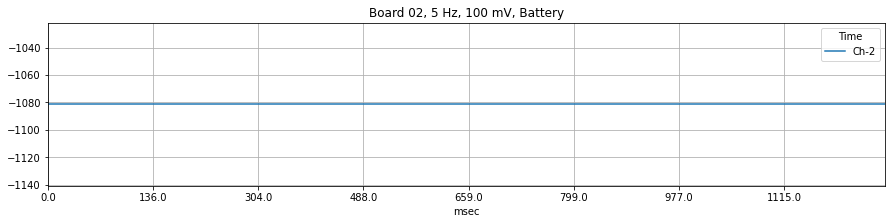

In [48]:
for individual, description, channel in zip(all_csv,specification,channel_specs):
    
    df = tidyTSAppOutput(pd.read_csv(individual))
    experiment_name = individual[20:-4]
    print(experiment_name, description, channel)
    plot_trace(df, channel, title = description, save= True, saveas = experiment_name)
    